<a href="https://colab.research.google.com/github/Vaibhav21pandit/Pytorch_Rally/blob/master/PytorchCatchUp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 23rd November 2023

# The purpose of this notebook is to catchup with PyToch and learn the syntax + how to build a neural net in Pytorch
# Additionally it may also serve as guide to deep diving into the different components that constitute a neural net

# Task 1 - Classify MNIST digits with a simple neural network
  # Learnings -
  #             a.)learn about the different components(optim,activations) that build up the Simple Neural Net and the nuances around them.
  #             b.)Learn abuot the HyperParameters and try to build the intuition on how to tune those.
  #             c.)Learn about the various metrics, multiclass/multilabel predictions.
  #             d.)Learn of the dataset creation, dataloading transforms and batch loading methods.
  #             e.)Learn how Normalization while transforming affects the results of training


# Task 2 - Classify Cats and Dogs with a CNN built from scratch
  # Learnings - a.)learn about the differences from a simple neural net and the theory about convolutional filters.(CS231n)
  #             b.)learn about the variuos tensor shapes and dimensions as they pass through the network.
  #             c.)learn how to use hooks to pull out the output of a certain layer.

# Task 3 - Classify Cats and Dogs with a pretrained models.
  # Learnings - a.)Learn the nuances of Transfer Learning

# Task 4 - NLP from scratch series on Pytorch docs - https://pytorch.org/tutorials/intermediate/char_rnn_classification_tutorial.html


# Task 1 Training a simple Neural Network on MNIST
WorkFlow - 1.) Import Needed libs

In [ ]:
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torch.utils.data import dataloader
import matplotlib.pyplot as plt



In [ ]:
# Load Data
mnist_data = MNIST(root='./',download=True,train=True,transform=transforms.ToTensor())
mnist_data_test = MNIST(root='./',download=True,train=False,transform=transforms.ToTensor())

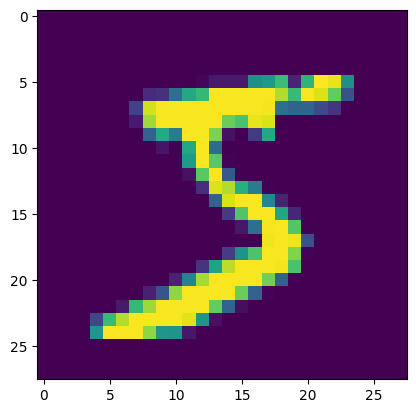

In [ ]:
# Visualize a sample
plt.imshow(mnist_data.data[0])

In [ ]:
# Load it without Transforming/Normalizing
# transform_ops = [transforms.ToTensor]
trainLoader = dataloader.DataLoader(mnist_data,batch_size=8)
testLoader = dataloader.DataLoader(mnist_data_test)

In [ ]:
import torch
from torch import nn
class DigitClassifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.neural_net = nn.Sequential(
        nn.Linear(in_features=(28*28),out_features=(20*20)),
        nn.ReLU(),
        nn.Linear(in_features=(20*20),out_features=(15*15)),
        nn.Sigmoid(),
        nn.Linear(in_features=(15*15),out_features=(7*7)),
        nn.Sigmoid(),
        nn.Linear(in_features=(7*7),out_features=(10)),
    )

  def forward(self,input):
    input= torch.flatten(input)
    x = self.neural_net(input)
    x = nn.Softmax(x)
    return x

net = DigitClassifier()

In [ ]:
from torch.optim import SGD
import torch.nn.functional as F
optimizer = SGD(net.parameters(),lr=0.001, momentum=0.0001)

loss_func = F.cross_entropy


In [ ]:
def train_net(net,loss_func,optimizer,dataloader):
  total_loss = 0
  for epoch in range(10):
    epoch_loss = 0

    for data,labels in dataloader:
      print(data.shape)
      optimizer.zero_grad()
      predictions = net(data)
      batch_loss = loss_func(predictions,labels)
      print("Batch Loss:::::",batch_loss)
      epoch_loss+=batch_loss
      batch_loss.backwards()
      optimizer.step()

    print("Epoch Loss",epoch_loss)

In [ ]:

train_net(net,loss_func,optimizer,dataloader=trainLoader)

torch.Size([8, 1, 28, 28])


RuntimeError: ignored

In [ ]:
for data,labels in trainLoader:
      print(torch.flatten(data[:2]).shape)
      break

torch.Size([1568])


In [ ]:
for data,labels in trainLoader:
      print(data.shape)
      print(data[-1].shape)
      print(data.view(data.shape[0], -1).shape)
      break

torch.Size([8, 1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([8, 784])


In [ ]:
data.shape

torch.Size([8, 1, 28, 28])